In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=50

import sklearn
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.preprocessing import normalize

In [5]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:\\Users\\JuhoSon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

# Data Load

In [6]:
df_20 = pd.read_csv('./data/innovation/create/df_age20.csv')

In [7]:
df_20.shape

(365, 38)

In [8]:
df_20.head()

,age20숙박,age20레저용품,age20레저업소,age20문화취미,age20가구,age20전기,age20주방,age20연료,age20광학,age20가전,age20유통업,age20의복,age20직물,age20신변잡화,age20서적문구,age20사무통신,age20자동차판매,age20자동차정비,age20의료기관,age20보건위생,age20요식업소,age20음료식품,age20수리서비스,age20,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,pm10,pm25,CONTENT,temp,humi,강수량(mm)
0,432.0,203.0,7993.0,1551.0,21.0,NaN,NaN,498.0,29.0,25.0,36130.0,705.0,NaN,433.0,1432.0,20.0,NaN,109.0,809.0,2419.0,29971.0,2634.0,205.0,276375.29,5.775959e+06,4.653959e+06,7.123695e+06,460575.529718,8.889679e+05,102938.908335,158304.695151,125768.139866,68.127083,35.221528,515,16.580764,56.770833,0.0
1,105.0,131.0,5367.0,791.0,NaN,NaN,NaN,470.0,63.0,70.0,39422.0,488.0,NaN,369.0,1665.0,112.0,NaN,107.0,4298.0,2108.0,31339.0,3434.0,332.0,362157.39,5.798567e+06,4.068040e+06,6.922594e+06,517274.801816,7.320147e+05,85751.772442,189721.667844,159773.285544,71.924306,29.909028,888,19.631111,57.827083,0.0
2,87.0,126.0,5656.0,526.0,NaN,NaN,18.0,384.0,42.0,43.0,38026.0,434.0,NaN,326.0,1329.0,112.0,NaN,138.0,3459.0,1974.0,32731.0,3467.0,255.0,364140.16,5.882238e+06,4.045719e+06,6.679634e+06,396954.848039,6.941187e+05,109181.181977,146743.364491,83460.961960,72.979861,24.331944,856,19.192500,61.674306,0.1
3,151.0,165.0,5300.0,534.0,NaN,NaN,NaN,308.0,80.0,74.0,38258.0,469.0,NaN,314.0,1426.0,83.0,NaN,135.0,3160.0,2047.0,32115.0,3520.0,313.0,355365.76,6.163598e+06,4.284199e+06,6.238373e+06,400734.630537,9.144325e+05,106260.195832,133827.487702,85526.543799,18.221528,10.952778,893,14.075417,60.129861,18.5
4,187.0,109.0,6001.0,729.0,NaN,NaN,NaN,312.0,89.0,60.0,35063.0,308.0,NaN,244.0,1308.0,56.0,NaN,77.0,3264.0,1838.0,30793.0,3818.0,234.0,343828.64,6.131853e+06,3.723724e+06,5.135552e+06,430144.414585,1.099378e+06,120809.906702,149481.681510,89173.629481,8.854861,3.891667,864,8.620000,77.163194,10.5


Text(0.5, 0, '업종')

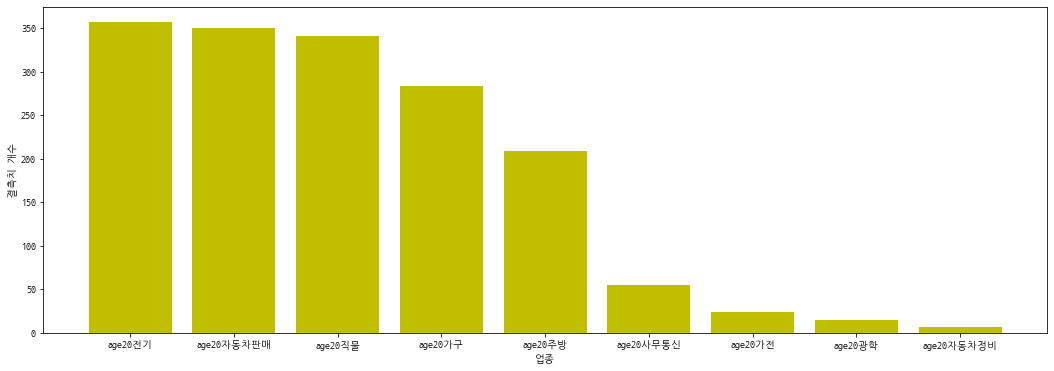

In [88]:
df_null = pd.DataFrame(df_20.isnull().sum()).rename(columns={0:'null'})

df_null.reset_index(inplace=True)

drop_idx = np.where(df_null.null==0)[0]
df_null.drop(drop_idx, inplace=True)

df_null = df_null.sort_values(by='null', ascending=False).set_index('index')

plt.figure(figsize=(18,6))
plt.bar(df_null.index, df_null.null, color='y')
plt.xticks(df_null.index)
plt.ylabel('결측치 개수')
plt.xlabel('업종')

In [9]:
print('age20 null columns : ', ['가구', '전기', '주방', '광학', '가전', '직물', '사무통신', '자동차판매', '자동차정비'])

age20 null columns :  ['가구', '전기', '주방', '광학', '가전', '직물', '사무통신', '자동차판매', '자동차정비']


In [10]:
df_20.drop(['age20가구', 'age20전기', 'age20주방', 
           'age20광학', 'age20가전', 'age20직물', 
           'age20사무통신', 'age20자동차판매', 'age20자동차정비'], axis=1, inplace=True)

In [11]:
df_20  = df_20.rename(columns={'강수량(mm)':'prec'})

In [12]:
df_20.columns = ['숙박', '레저용품', '레저업소', '문화취미', '연료', '유통업',
       '의복', '신변잡화', '서적문구', '의료기관', '보건위생',
       '요식업소', '음료식품', '수리서비스', 'pop', 'LCLS_10_P',
       'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P',
       'LCLS_70_P', 'LCLS_80_P', 'pm10', 'pm25', 'CONTENT', 'temp', 'humi',
       'prec']

In [13]:
df_20.head()

,숙박,레저용품,레저업소,문화취미,연료,유통업,의복,신변잡화,서적문구,의료기관,보건위생,요식업소,음료식품,수리서비스,pop,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,pm10,pm25,CONTENT,temp,humi,prec
0,432.0,203.0,7993.0,1551.0,498.0,36130.0,705.0,433.0,1432.0,809.0,2419.0,29971.0,2634.0,205.0,276375.29,5.775959e+06,4.653959e+06,7.123695e+06,460575.529718,8.889679e+05,102938.908335,158304.695151,125768.139866,68.127083,35.221528,515,16.580764,56.770833,0.0
1,105.0,131.0,5367.0,791.0,470.0,39422.0,488.0,369.0,1665.0,4298.0,2108.0,31339.0,3434.0,332.0,362157.39,5.798567e+06,4.068040e+06,6.922594e+06,517274.801816,7.320147e+05,85751.772442,189721.667844,159773.285544,71.924306,29.909028,888,19.631111,57.827083,0.0
2,87.0,126.0,5656.0,526.0,384.0,38026.0,434.0,326.0,1329.0,3459.0,1974.0,32731.0,3467.0,255.0,364140.16,5.882238e+06,4.045719e+06,6.679634e+06,396954.848039,6.941187e+05,109181.181977,146743.364491,83460.961960,72.979861,24.331944,856,19.192500,61.674306,0.1
3,151.0,165.0,5300.0,534.0,308.0,38258.0,469.0,314.0,1426.0,3160.0,2047.0,32115.0,3520.0,313.0,355365.76,6.163598e+06,4.284199e+06,6.238373e+06,400734.630537,9.144325e+05,106260.195832,133827.487702,85526.543799,18.221528,10.952778,893,14.075417,60.129861,18.5
4,187.0,109.0,6001.0,729.0,312.0,35063.0,308.0,244.0,1308.0,3264.0,1838.0,30793.0,3818.0,234.0,343828.64,6.131853e+06,3.723724e+06,5.135552e+06,430144.414585,1.099378e+06,120809.906702,149481.681510,89173.629481,8.854861,3.891667,864,8.620000,77.163194,10.5


<BarContainer object of 14 artists>

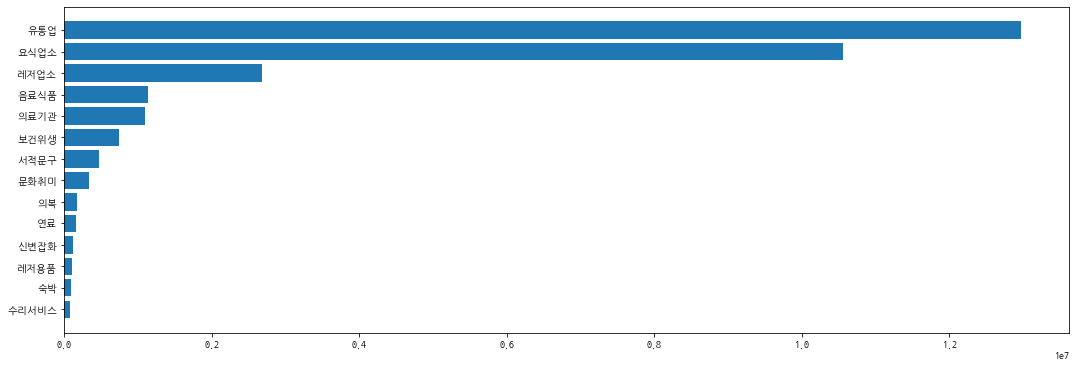

In [14]:
df_viz = df_20[['숙박', '레저용품', '레저업소', '문화취미', '연료', '유통업',
       '의복', '신변잡화', '서적문구', '의료기관', '보건위생',
       '요식업소', '음료식품', '수리서비스']].apply(lambda df:df.sum()).sort_values()

plt.figure(figsize=(18,6))
plt.barh(df_viz.index,
        df_viz)

# add weekday

In [15]:
df_20.index = pd.date_range('2018-04-01', '2019-03-31')

In [16]:
df_20['weekday'] = df_20.index.weekday  # 0 Monday 6 Sunday

In [17]:
weekend_dict = {0: 0, 1: 0, 2: 0, 3:0, 4:0, 5:1, 6:1}
df_20['weekend'] = [weekend_dict[i] for i in df_20['weekday'].values]

# Two_way Anova (F)

In [29]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
# good_idx = np.where(df_20.pm10<=50)[0]

# bad_idx = np.where(df_20.pm10>50)[0]

# df_20['pm10_category']=[0]*len(df_20)

In [11]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['pm10_category'].iloc[i] = 'good'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['pm10_category'].iloc[i] = 'bad'

In [12]:
# good_idx_25 = np.where(df_20.pm25<=25)[0]

# bad_idx_25 = np.where(df_20.pm25>25)[0]

# df_20['pm25_category']=[0]*len(df_20)

In [13]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['pm25_category'].iloc[i] = 'good'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['pm25_category'].iloc[i] = 'bad'

In [14]:
# good_idx_temp = np.where(df_20.temp<=35)[0]

# bad_idx_temp = np.where(df_20.temp>35)[0]

# df_20['temp_category']=[0]*len(df_20)

In [15]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['temp_category'].iloc[i] = 'bad'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['temp_category'].iloc[i] = 'good'

In [16]:
# df_anova = df_20[['age20숙박_USE_AMT', 'pm10', 'pm25', 'temp']]

* anova function

In [101]:
formula = '숙박 ~ temp + humi + prec + weekend + CONTENT + pm10 + pm25'
# :뒤로넣으면 서로 겹치는 변수를 고려해서 반영해주는것.
lm = ols(formula, df_20).fit()

In [102]:
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
pm10,1.0,7.507348e+04,75073.479325,4.968606,0.026437
pm25,1.0,3.745534e+04,37455.337109,2.478915,0.116273
temp,1.0,1.757853e+04,17578.528367,1.163404,0.281493
humi,1.0,1.467224e+04,14672.243167,0.971056,0.325088
prec,1.0,6.108905e+02,610.890518,0.040431,0.840756
pm10:temp,1.0,1.911251e+04,19112.513535,1.264928,0.261480
pm10:prec,1.0,5.420094e+00,5.420094,0.000359,0.984900
pm25:temp,1.0,2.306983e+03,2306.982800,0.152684,0.696218
pm25:prec,1.0,2.999732e+03,2999.732331,0.198532,0.656180
Residual,355.0,5.363896e+06,15109.567143,NaN,NaN


In [ ]:
'숙박 ~ temp + humi + prec + weekend + CONTENT + pm10 + pm25'

In [30]:
def anova(col_name):
    formula = col_name + ' ~ temp + humi + prec + weekend + CONTENT + pm10 + pm25'
    lm = ols(formula, df_20).fit()
    return anova_lm(lm), lm.summary()

In [33]:
def coef_bar(colname):
    X = df_20.drop(colname, axis=1)
    X = normalize(X)
    Y = df_20[colname]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    lasso = Lasso(fit_intercept=True,
    #               alpha=0.5
                 )
    lasso.fit(X_train, y_train)

    # set_df
    df = pd.DataFrame(ridge.coef_, df_20.drop(colname,axis=1).columns).rename(columns={0:'coef'})
    df = df.sort_values(by='coef', ascending=False)

    # bar
    plt.figure(figsize=(12, 6))
    plt.barh(df.index, df['coef'])
    # plt.xticks(df_sukbak['coef'])
    return None

# Check Coef

In [34]:
from sklearn.linear_model import Lasso, Ridge

In [35]:
from sklearn.model_selection import train_test_split

## 숙박 10

In [36]:
anova("숙박")

(             df        sum_sq       mean_sq            F         PR(>F)
 temp        1.0  5.476532e+04  5.476532e+04    17.175378   4.260572e-05
 humi        1.0  9.892897e+01  9.892897e+01     0.031026   8.602825e-01
 prec        1.0  9.760787e+01  9.760787e+01     0.030612   8.612090e-01
 weekend     1.0  4.305988e+06  4.305988e+06  1350.434426  2.258315e-123
 CONTENT     1.0  3.177323e+04  3.177323e+04     9.964652   1.731512e-03
 pm10        1.0  2.653993e+03  2.653993e+03     0.832339   3.622126e-01
 pm25        1.0  6.223418e+00  6.223418e+00     0.001952   9.647865e-01
 Residual  357.0  1.138328e+06  3.188595e+03          NaN            NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                     숙박   R-squared:                       0.794
 Model:                            OLS   Adj. R-squared:                  0.790
 Method:                 Least Squares   F-statistic

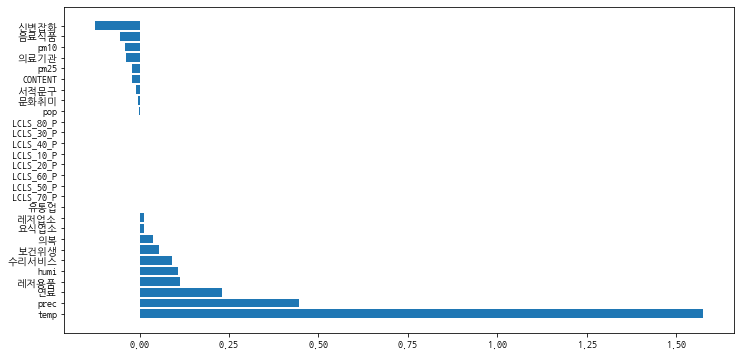

In [149]:
coef_bar('숙박')

## 레저용품 20

In [37]:
anova("레저용품")

(             df        sum_sq       mean_sq           F        PR(>F)
 temp        1.0  1.216900e+06  1.216900e+06  234.776189  4.419755e-41
 humi        1.0  5.936457e+04  5.936457e+04   11.453188  7.929896e-04
 prec        1.0  8.141367e+04  8.141367e+04   15.707114  8.932315e-05
 weekend     1.0  1.227706e+06  1.227706e+06  236.860856  2.353155e-41
 CONTENT     1.0  1.074404e+05  1.074404e+05   20.728452  7.269670e-06
 pm10        1.0  1.413616e+05  1.413616e+05   27.272848  3.007739e-07
 pm25        1.0  9.836368e+04  9.836368e+04   18.977274  1.731165e-05
 Residual  357.0  1.850415e+06  5.183236e+03         NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   레저용품   R-squared:                       0.613
 Model:                            OLS   Adj. R-squared:                  0.606
 Method:                 Least Squares   F-statistic:                 

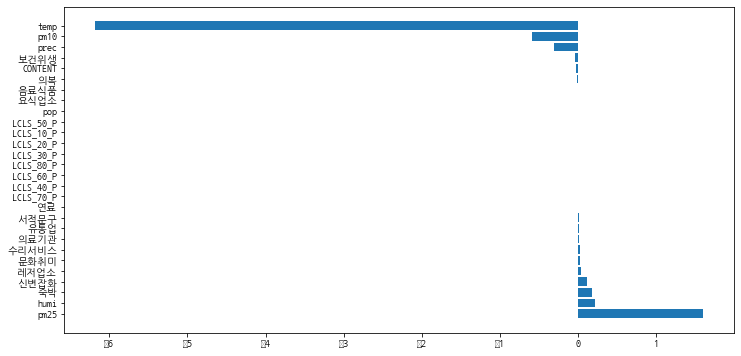

In [151]:
coef_bar('레저용품')

## 문화취미 22

In [152]:
anova("문화취미")

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  4.552796e+05  4.552796e+05   4.457206  3.545288e-02
 pm25            1.0  1.009448e+05  1.009448e+05   0.988254  3.208466e-01
 temp            1.0  8.456115e+03  8.456115e+03   0.082786  7.737251e-01
 humi            1.0  7.706482e+05  7.706482e+05   7.544679  6.325572e-03
 CONTENT         1.0  6.911488e+06  6.911488e+06  67.663766  3.711861e-15
 prec            1.0  7.750344e+04  7.750344e+04   0.758762  3.843049e-01
 CONTENT:temp    1.0  1.918119e+05  1.918119e+05   1.877847  1.714450e-01
 CONTENT:prec    1.0  6.800261e+02  6.800261e+02   0.006657  9.350160e-01
 CONTENT:humi    1.0  1.906307e+04  1.906307e+04   0.186628  6.660001e-01
 Residual      355.0  3.626133e+07  1.021446e+05        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   문화취미   R-squared:    

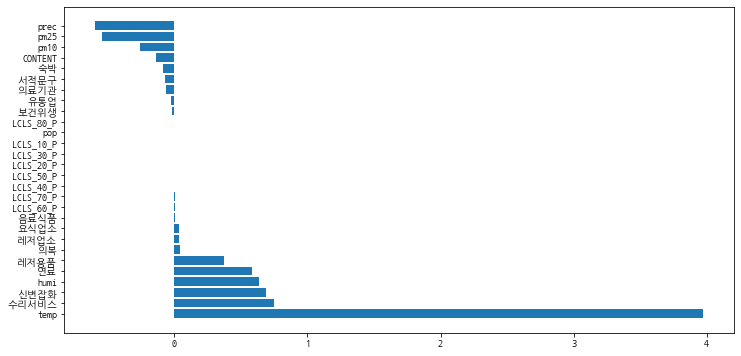

In [153]:
coef_bar('문화취미')

# 가구 30 Null로 삭제

## 전기 31 Null로 삭제

## 주방용구 32 Null로 삭제

## 유통업 40

In [154]:
anova("유통업")

(                 df        sum_sq       mean_sq           F        PR(>F)
 pm10            1.0  9.102984e+08  9.102984e+08  102.300689  2.674612e-21
 pm25            1.0  1.266173e+06  1.266173e+06    0.142294  7.062361e-01
 temp            1.0  1.088144e+09  1.088144e+09  122.287206  1.261467e-24
 humi            1.0  3.318750e+07  3.318750e+07    3.729660  5.425009e-02
 CONTENT         1.0  1.506003e+08  1.506003e+08   16.924685  4.838287e-05
 prec            1.0  2.280997e+08  2.280997e+08   25.634184  6.641957e-07
 CONTENT:temp    1.0  2.492792e+08  2.492792e+08   28.014362  2.113731e-07
 CONTENT:prec    1.0  1.650336e+06  1.650336e+06    0.185467  6.669776e-01
 CONTENT:humi    1.0  1.552287e+06  1.552287e+06    0.174448  6.764409e-01
 Residual      355.0  3.158883e+09  8.898263e+06         NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    유통업   R-s

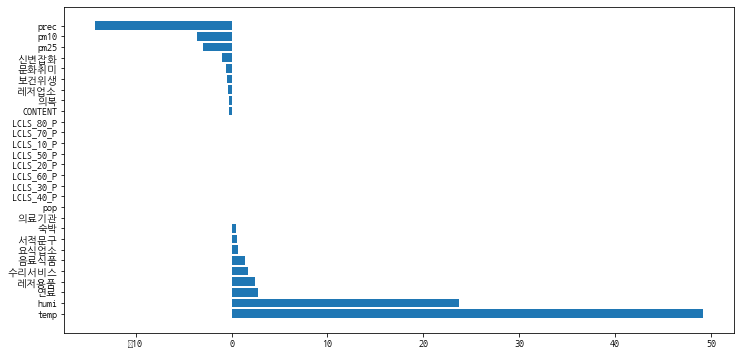

In [155]:
coef_bar('유통업')

## 의복 42

In [156]:
anova('의복')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.230354e+06  1.230354e+06  25.575738  6.832243e-07
 pm25            1.0  1.177184e+05  1.177184e+05   2.447047  1.186372e-01
 temp            1.0  1.903920e+06  1.903920e+06  39.577350  9.281884e-10
 humi            1.0  3.177409e+05  3.177409e+05   6.604974  1.057672e-02
 CONTENT         1.0  1.823238e+06  1.823238e+06  37.900195  2.013918e-09
 prec            1.0  3.479160e+05  3.479160e+05   7.232232  7.498535e-03
 CONTENT:temp    1.0  6.748383e+04  6.748383e+04   1.402806  2.370466e-01
 CONTENT:prec    1.0  3.477659e+03  3.477659e+03   0.072291  7.881858e-01
 CONTENT:humi    1.0  1.208025e+05  1.208025e+05   2.511157  1.139333e-01
 Residual      355.0  1.707774e+07  4.810630e+04        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                     의복   R-squared:    

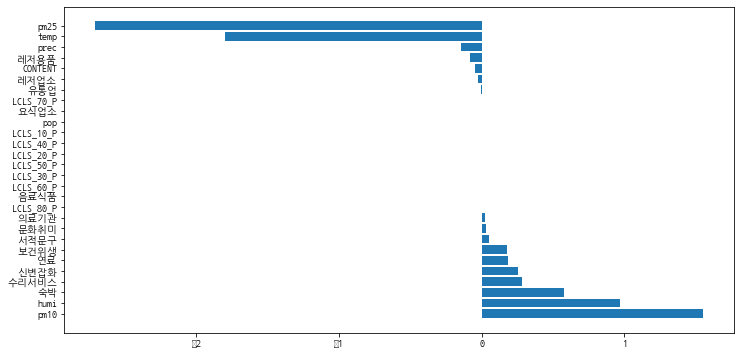

In [157]:
coef_bar('의복')

## 직물 43 Null로 삭제

## 신변잡화 44

In [158]:
anova('신변잡화')

(                 df        sum_sq        mean_sq          F        PR(>F)
 pm10            1.0  5.937350e+02     593.734979   0.105247  7.458127e-01
 pm25            1.0  1.615388e+02     161.538815   0.028635  8.657214e-01
 temp            1.0  6.018350e+03    6018.350389   1.066829  3.023660e-01
 humi            1.0  1.998610e+05  199861.036679  35.427898  6.356426e-09
 CONTENT         1.0  1.836792e+05  183679.188981  32.559460  2.440312e-08
 prec            1.0  4.872102e+04   48721.019413   8.636417  3.510616e-03
 CONTENT:temp    1.0  4.061838e+03    4061.837601   0.720012  3.967117e-01
 CONTENT:prec    1.0  2.509408e+03    2509.408126   0.444824  5.052364e-01
 CONTENT:humi    1.0  5.704339e+03    5704.339351   1.011166  3.153085e-01
 Residual      355.0  2.002678e+06    5641.346233        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   신변잡화   R-s

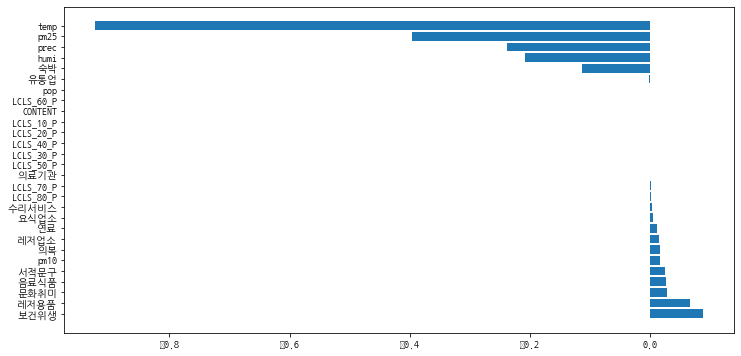

In [159]:
coef_bar('신변잡화')

## 서적문구 50

In [160]:
anova('서적문구')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  6.312687e+05  6.312687e+05   3.506351  6.195576e-02
 pm25            1.0  1.431977e+05  1.431977e+05   0.795385  3.730809e-01
 temp            1.0  4.573858e+06  4.573858e+06  25.405268  7.419241e-07
 humi            1.0  2.639884e+04  2.639884e+04   0.146631  7.020050e-01
 CONTENT         1.0  1.785256e+06  1.785256e+06   9.916118  1.777284e-03
 prec            1.0  9.629475e+03  9.629475e+03   0.053486  8.172372e-01
 CONTENT:temp    1.0  9.327677e+05  9.327677e+05   5.181012  2.343001e-02
 CONTENT:prec    1.0  3.052049e+05  3.052049e+05   1.695246  1.937551e-01
 CONTENT:humi    1.0  6.844264e+02  6.844264e+02   0.003802  9.508705e-01
 Residual      355.0  6.391271e+07  1.800358e+05        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   서적문구   R-squared:    

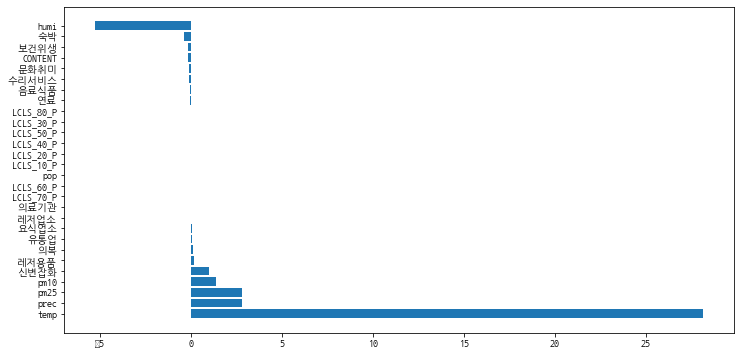

In [161]:
coef_bar('서적문구')

## 자동차판매 60 Null로 삭제

## 자동차정비 62 Null로 삭제

## 의료기관 70

In [162]:
anova('의료기관')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.822837e+05  1.822837e+05   0.139071  7.094284e-01
 pm25            1.0  1.134275e+05  1.134275e+05   0.086538  7.687969e-01
 temp            1.0  1.661842e+05  1.661842e+05   0.126789  7.219969e-01
 humi            1.0  1.042321e+06  1.042321e+06   0.795228  3.731281e-01
 CONTENT         1.0  6.206074e+07  6.206074e+07  47.348602  2.698171e-11
 prec            1.0  1.538542e+06  1.538542e+06   1.173815  2.793540e-01
 CONTENT:temp    1.0  1.243798e+07  1.243798e+07   9.489428  2.227833e-03
 CONTENT:prec    1.0  5.462831e+05  5.462831e+05   0.416781  5.189647e-01
 CONTENT:humi    1.0  5.206609e+05  5.206609e+05   0.397233  5.289273e-01
 Residual      355.0  4.653055e+08  1.310720e+06        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   의료기관   R-squared:    

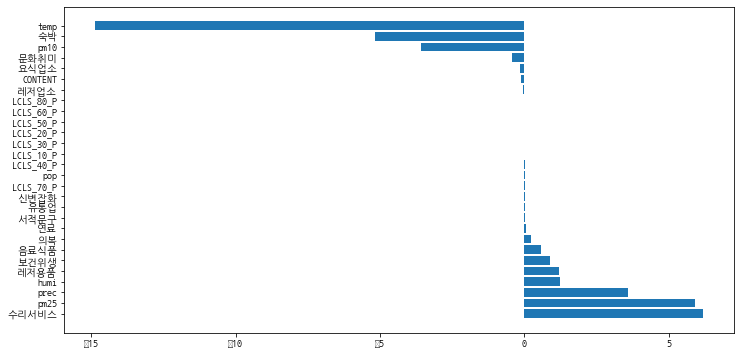

In [163]:
coef_bar('의료기관')

## 보건위생 71

In [164]:
anova('보건위생')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.812210e+05  1.812210e+05   1.459961  2.277406e-01
 pm25            1.0  1.115192e+05  1.115192e+05   0.898426  3.438490e-01
 temp            1.0  1.096968e+06  1.096968e+06   8.837442  3.152610e-03
 humi            1.0  2.300351e+06  2.300351e+06  18.532185  2.163859e-05
 CONTENT         1.0  6.632375e+06  6.632375e+06  53.432031  1.787349e-12
 prec            1.0  1.273783e+06  1.273783e+06  10.261909  1.480938e-03
 CONTENT:temp    1.0  1.776992e+05  1.776992e+05   1.431588  2.323039e-01
 CONTENT:prec    1.0  1.199443e+04  1.199443e+04   0.096630  7.560942e-01
 CONTENT:humi    1.0  9.925677e+05  9.925677e+05   7.996368  4.952973e-03
 Residual      355.0  4.406520e+07  1.241273e+05        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   보건위생   R-squared:    

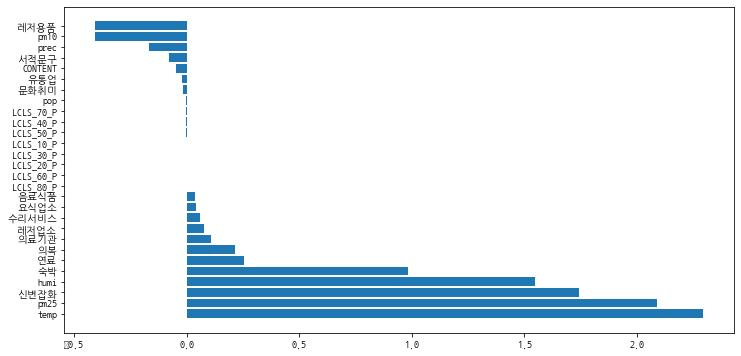

In [165]:
coef_bar('보건위생')

## 요식업소 80

In [166]:
anova('요식업소')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  3.210171e+08  3.210171e+08  37.361462  2.585108e-09
 pm25            1.0  3.512508e+06  3.512508e+06   0.408802  5.229906e-01
 temp            1.0  1.278098e+08  1.278098e+08  14.875094  1.363836e-04
 humi            1.0  7.030146e+07  7.030146e+07   8.182009  4.481129e-03
 CONTENT         1.0  3.586854e+07  3.586854e+07   4.174547  4.177351e-02
 prec            1.0  1.316463e+08  1.316463e+08  15.321610  1.087055e-04
 CONTENT:temp    1.0  2.257943e+08  2.257943e+08  26.278989  4.865670e-07
 CONTENT:prec    1.0  7.042483e+06  7.042483e+06   0.819637  3.659004e-01
 CONTENT:humi    1.0  1.227345e+07  1.227345e+07   1.428441  2.328169e-01
 Residual      355.0  3.050231e+09  8.592200e+06        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   요식업소   R-squared:    

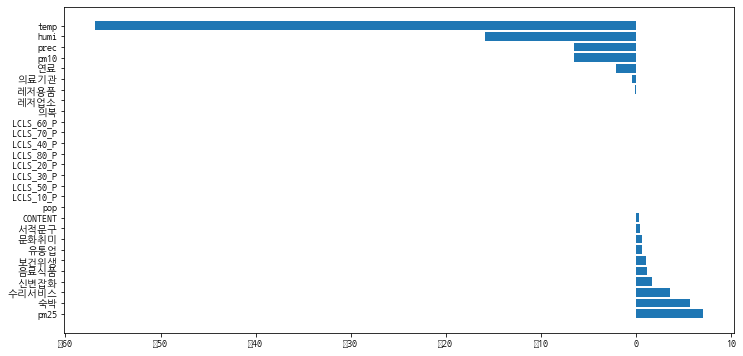

In [167]:
coef_bar('요식업소')

## 음료식품 81

In [168]:
anova('음료식품')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  2.920715e+06  2.920715e+06  13.547250  2.687539e-04
 pm25            1.0  4.012914e+05  4.012914e+05   1.861323  1.733365e-01
 temp            1.0  6.028425e+05  6.028425e+05   2.796184  9.537002e-02
 humi            1.0  3.567793e+05  3.567793e+05   1.654861  1.991369e-01
 CONTENT         1.0  2.011030e+07  2.011030e+07  93.278251  9.521644e-20
 prec            1.0  1.010795e+06  1.010795e+06   4.688404  3.103245e-02
 CONTENT:temp    1.0  1.061824e+07  1.061824e+07  49.250931  1.148805e-11
 CONTENT:prec    1.0  5.564802e+04  5.564802e+04   0.258114  6.117343e-01
 CONTENT:humi    1.0  3.872784e+04  3.872784e+04   0.179633  6.719458e-01
 Residual      355.0  7.653612e+07  2.155947e+05        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   음료식품   R-squared:    

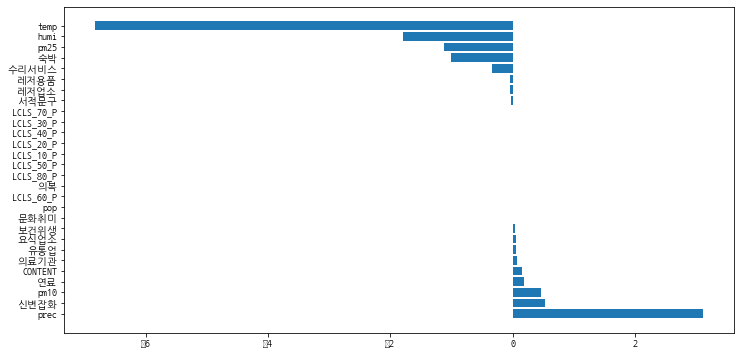

In [169]:
coef_bar('음료식품')

## 수리서비스 92

In [170]:
anova('수리서비스')

(                 df        sum_sq       mean_sq          F    PR(>F)
 pm10            1.0  3.830652e+04  38306.516512  10.179075  0.001547
 pm25            1.0  2.522072e+02    252.207215   0.067018  0.795879
 temp            1.0  5.160381e+04  51603.814574  13.712526  0.000247
 humi            1.0  4.672336e+03   4672.336280   1.241566  0.265923
 CONTENT         1.0  5.571701e+04  55717.012470  14.805514  0.000141
 prec            1.0  2.115469e+03   2115.469078   0.562137  0.453897
 CONTENT:temp    1.0  6.433032e+04  64330.324593  17.094303  0.000044
 CONTENT:prec    1.0  1.059960e+03   1059.959924   0.281660  0.595947
 CONTENT:humi    1.0  2.560329e+02    256.032945   0.068035  0.794371
 Residual      355.0  1.335958e+06   3763.260993        NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  수리서비스   R-squared:                       0.140
 Model:            

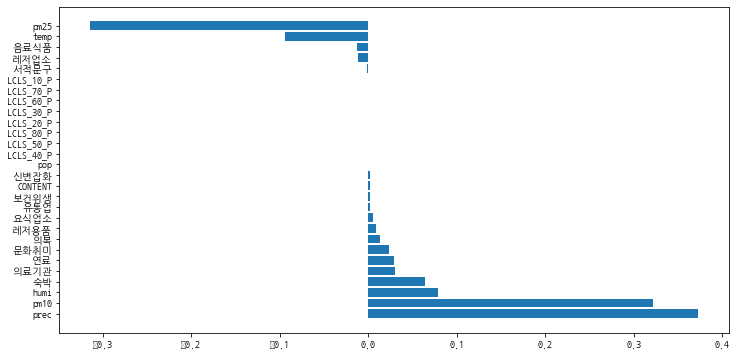

In [171]:
coef_bar('수리서비스')

In [172]:
# pm25_first =  ['수리서비스', '보건위생', '의복', '레저용품', '숙박']
# temp_frist =  ['음료식품', '유통', '문화취미' ]
# pm10_first =  ['요식업소', '의료기관', '자동차정비', '서적문구', '신변잡화']

In [173]:
anova('LCLS_10_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  8.933597e+12  8.933597e+12  31.794280  3.501464e-08
 pm25            1.0  1.863205e+11  1.863205e+11   0.663106  4.160113e-01
 temp            1.0  2.735204e+12  2.735204e+12   9.734471  1.956494e-03
 humi            1.0  2.298315e+11  2.298315e+11   0.817960  3.663906e-01
 CONTENT         1.0  2.367124e+12  2.367124e+12   8.424489  3.933228e-03
 prec            1.0  2.447142e+12  2.447142e+12   8.709271  3.376303e-03
 CONTENT:temp    1.0  3.160753e+12  3.160753e+12  11.248982  8.826305e-04
 CONTENT:prec    1.0  1.199148e+09  1.199148e+09   0.004268  9.479498e-01
 CONTENT:humi    1.0  5.533765e+08  5.533765e+08   0.001969  9.646277e-01
 Residual      355.0  9.974835e+13  2.809813e+11        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_10_P   R-squared:    

In [174]:
anova('LCLS_10_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  8.933597e+12  8.933597e+12  31.794280  3.501464e-08
 pm25            1.0  1.863205e+11  1.863205e+11   0.663106  4.160113e-01
 temp            1.0  2.735204e+12  2.735204e+12   9.734471  1.956494e-03
 humi            1.0  2.298315e+11  2.298315e+11   0.817960  3.663906e-01
 CONTENT         1.0  2.367124e+12  2.367124e+12   8.424489  3.933228e-03
 prec            1.0  2.447142e+12  2.447142e+12   8.709271  3.376303e-03
 CONTENT:temp    1.0  3.160753e+12  3.160753e+12  11.248982  8.826305e-04
 CONTENT:prec    1.0  1.199148e+09  1.199148e+09   0.004268  9.479498e-01
 CONTENT:humi    1.0  5.533765e+08  5.533765e+08   0.001969  9.646277e-01
 Residual      355.0  9.974835e+13  2.809813e+11        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_10_P   R-squared:    

In [175]:
anova('LCLS_20_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  5.611045e+12  5.611045e+12  4.765399  0.029692
 pm25            1.0  3.639750e+11  3.639750e+11  0.309120  0.578571
 temp            1.0  1.437938e+12  1.437938e+12  1.221225  0.269869
 humi            1.0  4.251533e+12  4.251533e+12  3.610780  0.058216
 CONTENT         1.0  4.981662e+12  4.981662e+12  4.230870  0.040425
 prec            1.0  2.499063e+11  2.499063e+11  0.212243  0.645297
 CONTENT:temp    1.0  3.679487e+12  3.679487e+12  3.124948  0.077961
 CONTENT:prec    1.0  7.347821e+08  7.347821e+08  0.000624  0.980084
 CONTENT:humi    1.0  4.706199e+12  4.706199e+12  3.996923  0.046345
 Residual      355.0  4.179967e+14  1.177456e+12       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_20_P   R-squared:                       0.057
 Model:                       

In [176]:
anova('LCLS_30_P')

(                 df        sum_sq       mean_sq            F         PR(>F)
 pm10            1.0  7.222900e+13  7.222900e+13   370.584506   4.620354e-57
 pm25            1.0  1.160194e+12  1.160194e+12     5.952593   1.518444e-02
 temp            1.0  3.596653e+14  3.596653e+14  1845.330820  1.092469e-142
 humi            1.0  5.339780e+13  5.339780e+13   273.967469   5.181462e-46
 CONTENT         1.0  2.809228e+13  2.809228e+13   144.132760   4.221623e-28
 prec            1.0  2.116534e+13  2.116534e+13   108.592774   2.312457e-22
 CONTENT:temp    1.0  4.271923e+12  4.271923e+12    21.917905   4.056146e-06
 CONTENT:prec    1.0  5.428322e+11  5.428322e+11     2.785103   9.602621e-02
 CONTENT:humi    1.0  1.281016e+11  1.281016e+11     0.657250   4.180758e-01
 Residual      355.0  6.919149e+13  1.949056e+11          NaN            NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       

In [177]:
anova('LCLS_40_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  7.366107e+09  7.366107e+09  0.960162  0.327813
 pm25            1.0  1.148729e+10  1.148729e+10  1.497353  0.221891
 temp            1.0  1.325930e+09  1.325930e+09  0.172833  0.677857
 humi            1.0  1.113881e+10  1.113881e+10  1.451930  0.229021
 CONTENT         1.0  2.810646e+10  2.810646e+10  3.663639  0.056416
 prec            1.0  7.386242e+09  7.386242e+09  0.962787  0.327154
 CONTENT:temp    1.0  4.028943e+09  4.028943e+09  0.525167  0.469123
 CONTENT:prec    1.0  6.239313e+08  6.239313e+08  0.081329  0.775671
 CONTENT:humi    1.0  7.353784e+09  7.353784e+09  0.958556  0.328218
 Residual      355.0  2.723465e+12  7.671731e+09       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_40_P   R-squared:                       0.028
 Model:                       

In [178]:
anova('LCLS_50_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  5.250810e+10  5.250810e+10   1.269774  2.605701e-01
 pm25            1.0  4.130655e+11  4.130655e+11   9.988933  1.710224e-03
 temp            1.0  7.832616e+07  7.832616e+07   0.001894  9.653103e-01
 humi            1.0  4.044735e+12  4.044735e+12  97.811565  1.567290e-20
 CONTENT         1.0  1.057183e+12  1.057183e+12  25.565257  6.866946e-07
 prec            1.0  1.369148e+12  1.369148e+12  33.109338  1.883709e-08
 CONTENT:temp    1.0  9.761613e+10  9.761613e+10   2.360597  1.253254e-01
 CONTENT:prec    1.0  3.080522e+10  3.080522e+10   0.744946  3.886639e-01
 CONTENT:humi    1.0  2.745522e+10  2.745522e+10   0.663934  4.157207e-01
 Residual      355.0  1.468007e+13  4.135231e+10        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_50_P   R-squared:    

In [179]:
anova('LCLS_60_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  1.847013e+10  1.847013e+10  2.733306  0.099160
 pm25            1.0  3.295581e+09  3.295581e+09  0.487697  0.485413
 temp            1.0  1.640962e+09  1.640962e+09  0.242838  0.622468
 humi            1.0  2.305924e+09  2.305924e+09  0.341243  0.559484
 CONTENT         1.0  1.519587e+07  1.519587e+07  0.002249  0.962204
 prec            1.0  2.121715e+09  2.121715e+09  0.313982  0.575600
 CONTENT:temp    1.0  1.046713e+10  1.046713e+10  1.548981  0.214107
 CONTENT:prec    1.0  4.184764e+09  4.184764e+09  0.619283  0.431839
 CONTENT:humi    1.0  2.932973e+09  2.932973e+09  0.434037  0.510442
 Residual      355.0  2.398888e+12  6.757430e+09       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_60_P   R-squared:                       0.019
 Model:                       

In [180]:
anova('LCLS_70_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  9.549002e+08  9.549002e+08   1.549316  2.140575e-01
 pm25            1.0  1.886506e+07  1.886506e+07   0.030608  8.612167e-01
 temp            1.0  8.823692e+09  8.823692e+09  14.316352  1.813076e-04
 humi            1.0  9.815934e+09  9.815934e+09  15.926256  8.003357e-05
 CONTENT         1.0  1.611467e+10  1.611467e+10  26.145886  5.188168e-07
 prec            1.0  2.028730e+09  2.028730e+09   3.291594  7.047941e-02
 CONTENT:temp    1.0  9.074497e+07  9.074497e+07   0.147233  7.014236e-01
 CONTENT:prec    1.0  1.427255e+08  1.427255e+08   0.231571  6.306581e-01
 CONTENT:humi    1.0  2.143083e+08  2.143083e+08   0.347713  5.557856e-01
 Residual      355.0  2.187995e+11  6.163366e+08        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_70_P   R-squared:    

In [181]:
anova('LCLS_80_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.825324e+10  1.825324e+10  23.580050  1.799526e-06
 pm25            1.0  2.957240e+09  2.957240e+09   3.820246  5.142143e-02
 temp            1.0  6.302719e+10  6.302719e+10  81.420301  1.170467e-17
 humi            1.0  2.058987e+10  2.058987e+10  26.598571  4.171400e-07
 CONTENT         1.0  8.851676e+09  8.851676e+09  11.434844  8.010733e-04
 prec            1.0  6.588466e+09  6.588466e+09   8.511166  3.754429e-03
 CONTENT:temp    1.0  1.426982e+08  1.426982e+08   0.184342  6.679289e-01
 CONTENT:prec    1.0  2.457016e+07  2.457016e+07   0.031740  8.587002e-01
 CONTENT:humi    1.0  1.603779e+08  1.603779e+08   0.207181  6.492644e-01
 Residual      355.0  2.748044e+11  7.740968e+08        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_80_P   R-squared:    